# Project: Email Processing 
## Citation

### Packages and Algorithms  
1. gensim Packages  
* Summarizing is based on ranks of text sentences using a variation of the TextRank algorithm. Federico Barrios, Federico L´opez, Luis Argerich, Rosita Wachenchauzer (2016). Variations of the Similarity Function of TextRank for Automated Summarization, https://arxiv.org/abs/1602.03606

2. fastai library
* Universal Language Model Fine-tuning (ULMFiT) : Howard, Jeremy, and Sebastian Ruder. "Universal language model fine-tuning for text classification." arXiv preprint arXiv:1801.06146 (2018). https://arxiv.org/abs/1801.06146 

### Data source  
1. Students in the ANLP course annotated a subset of about 1700 labeled email messages 
   http://bailando.sims.berkeley.edu/enron/enron_with_categories.tar.gz
2. mysql dataset (219 MB compressed) of the Enron email collection, built by Andrew Fiore and Jeff Heer, containing the enron email messages.
   http://bailando.sims.berkeley.edu/enron/enron.sql.gz


## Dependencies  
    python 3.6.7 +  
    fastai
    gensim

## Business Problems
* Use email content to do classification

## Descriptions



In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.text import *

## Data Preparation

In [3]:
from pathlib import Path
import os

In [4]:
nm_dataset = "Enron_emails"
nm_content = "email_rec_vec.csv"
nm_contact = "contacts.csv"
path = Path("../data")

In [5]:
path.joinpath(nm_dataset).ls()

[PosixPath('../data/Enron_emails/contacts.csv'),
 PosixPath('../data/Enron_emails/emails.csv'),
 PosixPath('../data/Enron_emails/emails_1.csv'),
 PosixPath('../data/Enron_emails/email_rec_vec.csv')]

In [120]:
import pandas as pd
df_model = pd.read_csv(path.joinpath(nm_dataset).joinpath(nm_content))

def extract_cls_1(txt):
    li_1 = []
    li_3 = []
    for w in txt.replace('[', '').replace(']', '').replace("'", '').replace(" ", '').split(','):        
        if w[0] == '1':
            w = w.replace('1_8','1_7').replace('1_3','1_2')
            li_1.append(w)            
        if w[0] == '3':
            if w in ['3_1', '3_2', '3_3', '3_4', '3_5', '3_6', '3_7', '3_8', '3_10']:
                w = w.replace('3_4','3_3').replace('3_8','3_7')
                li_3.append(w)
    if len(li_3) > 0:
        try:
            li_1.remove('1_1') 
        except:
            pass
    li = li_1 + li_3
    return str(list(set(li)))

ASGNTO = [extract_cls_1(w) for w in df_model.ASGNTO]
df_model.ASGNTO = ASGNTO
df_model[df_model.text.str.len()>10].to_csv(path.joinpath('tmp').joinpath("df_model.csv"))

df_model.head()

,master_rootid,DOCKET,SUBJECT,LEAD,RECEIVED,PRIORITY,ASGNTO,FNAME,LNAME,PROV,...,193.1.1,194.1.1,195.1.1,196.1.1,197.1.1,198.1.1,199.1.1,200.1.1,201.1.1,202.1.1
0,14452264,1075858883447,Re: EBS Article for eBiz,,07/13/2001,GEN,['1_6'],steven,kean,,...,-0.040236,-0.017470,-0.010608,0.012404,0.021194,0.066824,0.048412,0.037350,-0.040071,-0.026860
1,22747723,1075858707662,Bingaman Draft On Transparency -- Amendment I...,,09/11/2001,GEN,"['3_1', '1_6']",john,shelk,,...,-0.034514,0.001341,0.001764,0.033844,0.007577,0.055819,0.068106,0.017514,-0.056034,-0.068647
2,10462332,1075863429489,RE: Greetings from London,,06/29/2001,GEN,['1_6'],j,kaminski,,...,-0.042059,0.000198,-0.018794,0.011612,0.016051,0.039815,0.054362,0.023967,-0.053165,-0.032937
3,31003117,1075863429910,"RE: London, New York, Houston, Financial Math...",,07/03/2001,GEN,['1_6'],j,kaminski,,...,-0.051478,-0.009020,-0.023409,0.006384,0.015031,0.043426,0.053710,0.007815,-0.044894,-0.031132
4,16142741,1075849870380,UC-CSU-Enron press release,,07/06/2001,GEN,['1_6'],steven,kean,,...,-0.019960,-0.006133,-0.044903,0.025784,-0.009089,0.061070,0.044286,0.031267,-0.052956,-0.040431


In [148]:
sum(df_model.ASGNTO.str.contains('3_10'))

76

In [7]:
sum(['3_13' in w for w in df_model.ASGNTO])

0

In [8]:
df_model[df_model.text.str.len()>10].to_csv(path.joinpath('tmp').joinpath("df_model.csv"))

In [9]:
df_model.head()

,master_rootid,DOCKET,SUBJECT,LEAD,RECEIVED,PRIORITY,ASGNTO,FNAME,LNAME,PROV,...,193.1.1,194.1.1,195.1.1,196.1.1,197.1.1,198.1.1,199.1.1,200.1.1,201.1.1,202.1.1
0,14452264,1075858883447,Re: EBS Article for eBiz,,07/13/2001,GEN,['1_6'],steven,kean,,...,-0.040236,-0.017470,-0.010608,0.012404,0.021194,0.066824,0.048412,0.037350,-0.040071,-0.026860
1,22747723,1075858707662,Bingaman Draft On Transparency -- Amendment I...,,09/11/2001,GEN,['1_6'],john,shelk,,...,-0.034514,0.001341,0.001764,0.033844,0.007577,0.055819,0.068106,0.017514,-0.056034,-0.068647
2,10462332,1075863429489,RE: Greetings from London,,06/29/2001,GEN,['1_6'],j,kaminski,,...,-0.042059,0.000198,-0.018794,0.011612,0.016051,0.039815,0.054362,0.023967,-0.053165,-0.032937
3,31003117,1075863429910,"RE: London, New York, Houston, Financial Math...",,07/03/2001,GEN,['1_6'],j,kaminski,,...,-0.051478,-0.009020,-0.023409,0.006384,0.015031,0.043426,0.053710,0.007815,-0.044894,-0.031132
4,16142741,1075849870380,UC-CSU-Enron press release,,07/06/2001,GEN,['1_6'],steven,kean,,...,-0.019960,-0.006133,-0.044903,0.025784,-0.009089,0.061070,0.044286,0.031267,-0.052956,-0.040431


In [149]:
import random
df_raw = pd.read_csv(path.joinpath('tmp').joinpath("df_model.csv"))
df_raw['text'] = [' '.join(e.split()[:400]) for e in df_raw.text] 
df_raw['text'] = df_raw['SUBJECT'] + " " + df_raw['text']
#isQ = ['Q' if value % 2 == 0 else 'A' for value in df_raw.index]
#df_raw['type'] = isQ

df = df_raw[['master_rootid', 'ASGNTO', 'text', "filename"]]
df.columns = ['master_rootid', 'label', 'text', "filename"]

df = df.sample(frac=1).reset_index(drop=True)
df.head(10)

,master_rootid,label,text,filename
0,17141704,['3_2'],Ross Perot's EMS company We can create signi...,NaN
1,14087976,['3_1'],Status of Discussions on Electricity Legislat...,NaN
2,32477848,['1_6'],Revised list of PRC Reps Make sure this is c...,NaN
3,16674090,"['3_3', '1_4']",Joe asked me to get in touch with you regar...,NaN
4,3524436,['3_2'],RE: Confidential Contact data and RFI Any nu...,NaN
5,5667453,"['1_2', '1_4']","RE: Natasha, Thanks. I left my package and a...",NaN
6,24297292,['1_4'],<<Concur Expense Document>> - JB 003 -------...,NaN
7,8610006,['3_1'],RE: PG&E PX Credit Calculation -- CONFIDENTIA...,NaN
8,33199186,"['3_3', '3_6']",Red Herring Article Hap -- could you provide...,NaN
9,26474922,"['3_1', '3_7']",Reliability and Security Arguments (RTOs) Th...,NaN


In [150]:
is_valid = [random.randint(1,101) > 80 for value in df.index]
df['is_valid'] = is_valid

In [151]:
print(sum(df.is_valid))
print(len(df))

255
1693


In [155]:
df[['master_rootid', 'label', 'is_valid']].to_csv(path.joinpath('tmp').joinpath('isvalid.csv'), index=False)
df[['master_rootid', 'label', 'is_valid']].head(3)

,master_rootid,label,is_valid
0,17141704,['3_2'],False
1,14087976,['3_1'],True
2,32477848,['1_6'],False


In [156]:
df[['label', 'text', "filename", 'is_valid']].to_csv(path.joinpath('tmp').joinpath('texts.csv'), index=False)
df[['label', 'text', "filename", 'is_valid']].head(3)

,label,text,filename,is_valid
0,['3_2'],Ross Perot's EMS company We can create signi...,NaN,False
1,['3_1'],Status of Discussions on Electricity Legislat...,NaN,True
2,['1_6'],Revised list of PRC Reps Make sure this is c...,NaN,False


## Language model

Note that language models can use a lot of GPU, so you may need to decrease batchsize here.

In [15]:
bs=8

Now let's grab the full dataset for what follows.

In [16]:
path = Path("../data/tmp")
path.ls()

[PosixPath('../data/tmp/data_lm.pkl'),
 PosixPath('../data/tmp/df_model.csv'),
 PosixPath('../data/tmp/texts.csv'),
 PosixPath('../data/tmp/models'),
 PosixPath('../data/tmp/data_clas.pkl')]

The reviews are in a training and test set following an imagenet structure. The only difference is that there is an `unsup` folder on top of `train` and `test` that contains the unlabelled data.

We're not going to train a model that classifies the reviews from scratch. Like in computer vision, we'll use a model pretrained on a bigger dataset (a cleaned subset of wikipedia called [wikitext-103](https://einstein.ai/research/blog/the-wikitext-long-term-dependency-language-modeling-dataset)). That model has been trained to guess what the next word is, its input being all the previous words. It has a recurrent structure and a hidden state that is updated each time it sees a new word. This hidden state thus contains information about the sentence up to that point.

We are going to use that 'knowledge' of the English language to build our classifier, but first, like for computer vision, we need to fine-tune the pretrained model to our particular dataset. Because the English of the reviews left by people on IMDB isn't the same as the English of wikipedia, we'll need to adjust the parameters of our model by a little bit. Plus there might be some words that would be extremely common in the reviews dataset but would be barely present in wikipedia, and therefore might not be part of the vocabulary the model was trained on.

This is where the unlabelled data is going to be useful to us, as we can use it to fine-tune our model. Let's create our data object with the data block API (next line takes a few minutes).

In [17]:
data_lm = (TextList.from_csv(path, 'texts.csv', cols='text')
                .split_from_df(col=3)
                .label_for_lm() 
                #We want to do a language model so we label accordingly
                .databunch(bs=bs))
data_lm.save('data_lm.pkl')

We have to use a special kind of `TextDataBunch` for the language model, that ignores the labels (that's why we put 0 everywhere), will shuffle the texts at each epoch before concatenating them all together (only for training, we don't shuffle for the validation set) and will send batches that read that text in order with targets that are the next word in the sentence.

The line before being a bit long, we want to load quickly the final ids by using the following cell.

In [18]:
data_lm = load_data(path, 'data_lm.pkl', bs=bs)

In [19]:
data_lm.show_batch()

idx,text
0,", xxmaj leslie xxmaj sent : xxmaj friday , xxmaj december 22 , 2000 xxunk xxup pm xxmaj to : xxmaj knight , xxmaj robert ; xxmaj xxunk , xxmaj darren xxup p. ; xxmaj cummings , xxmaj david xxup a. ; xxmaj hill , xxmaj ben xxmaj subject : xxup fw : xxmaj sempra et al . v. xxup ena et al . xxup privileged xxup and xxup confidential"
1,"modest relief to xxmaj san xxmaj diego residents xxunk with high electricity bills and set the groundwork for faster construction of badly needed power plants . xxmaj they stopped short , however , of passing legislation that would roll back retail power rates to levels seen prior to deregulation . xxmaj late xxmaj wednesday , lawmakers sent a bill to xxmaj gov. xxmaj gray xxmaj davis that limits to 6.5"
2,xxmaj dasovich / xxup na / enron@enron cc : xxmaj subject : xxup new xxup draft xxup of xxup enron xxup statement xxup here xxup is xxup the xxup most xxup recent xxup statement xxup with xxup steve xxup 's xxup comments . xxmaj jim xxbos xxup fw : xxmaj committee on xxmaj energy and xxmaj commerce xxmaj hearing xxmaj notices xxup fyi -- see hearing notices below for two
3,"available on my web xxunk xxunk at : xxunk xxrep 8 ? xxup on xxup the xxup exercise xxup of xxup market xxup power xxup through xxup strategic xxup withholding xxup in xxup california xxmaj scott xxmaj harvey and xxmaj william xxup w. xxmaj hogan xxmaj april 24 , 2001 xxup executive xxup summary xxmaj beginning in xxmaj june of 2000 , the xxunk of xxunk high prices in the=20"
4,. xxmaj sharer wants the same information as mcnealy and he and mcnealy both indicated their willingness to call a meeting of other xxmaj california ceos . xxmaj sharer will also be having breakfast with xxmaj hertzberg one week from today . xxmaj robert xxmaj day ( xxmaj trust xxmaj co of the xxmaj west ) : said that he is very close to the mayor of xxmaj los xxmaj


We can then put this in a learner object very easily with a model loaded with the pretrained weights. They'll be downloaded the first time you'll execute the following line and stored in `~/.fastai/models/` (or elsewhere if you specified different paths in your config file).

In [20]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

In [21]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


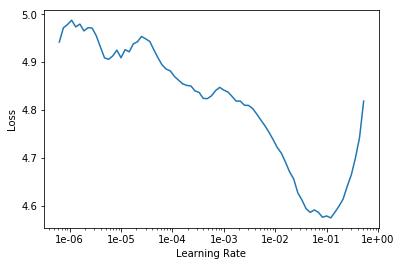

In [22]:
learn.recorder.plot(skip_end=15)

In [23]:
learn.fit_one_cycle(2, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,3.152664,2.802306,0.477986,01:33
1,2.470355,2.585152,0.511546,01:34


In [24]:
learn.save('fit_head')

In [25]:
learn.load('fit_head');

To complete the fine-tuning, we can then unfeeze and launch a new training.

In [26]:
learn.unfreeze()

In [27]:
learn.fit_one_cycle(5, 1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,2.225122,2.485965,0.529233,01:55
1,1.844594,2.328868,0.560752,01:54
2,1.597974,2.242075,0.586206,02:01
3,1.132154,2.190568,0.612377,02:06
4,0.795386,2.214958,0.616223,02:06


In [28]:
learn.save('fine_tuned')

How good is our model? Well let's try to see what it predicts after a few given words.

In [29]:
learn.load('fine_tuned');

In [30]:
TEXT = "animal is our friend "
N_WORDS = 40
N_SENTENCES = 2

In [31]:
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))

animal is our friend  who may be interested in a job with the Enron Corporation . He is an Analyst and Associate . Steven J. Kean , President and CEO of the Analyst
animal is our friend  who is interested in a job with Enron . He is an WATKISS highly senior and has published about every economists around us . My friend , Bill Moore , is a former


We have to save not only the model, but also its encoder, the part that's responsible for creating and updating the hidden state. For the next part, we don't care about the part that tries to guess the next word.

In [32]:
learn.save_encoder('fine_tuned_enc')

## Classifier

Now, we'll create a new data object that only grabs the labelled data and keeps those labels. Again, this line takes a bit of time.

#### Need to modified the labels

In [33]:
df_tmp = pd.read_csv(path.joinpath('texts.csv'))

In [34]:
#lbl = "['1_1', '1_2', '1_3', '1_4', '1_5', '1_6', '1_7', '1_8']"
def castStr2List(lbl_str):
    return ([w.replace("'",'').replace("[",'').replace("]","").replace(" ","") for w in lbl_str.split(",")])

# get the set of department used in the samples
def findDistinctList(label):
    li = []
    for e in label:
        li = li + list(set(castStr2List(e)))
    df_li = DataFrame()
    df_li['dept'] = li

    return(df_li.groupby(['dept']).size().reset_index(name='counts'))
    
df_lbl_unique = findDistinctList(df_tmp.label)
df_lbl_unique = df_lbl_unique[df_lbl_unique.counts > 10]
lbl_unique = list(df_lbl_unique['dept'])


In [35]:
len(lbl_unique)

6

In [36]:
rows = np.array([])
cols = np.array([])

for e in df_tmp.label:        
    li = castStr2List(e)
    cols = []
    for ee in lbl_unique:
        if ee in li:
            cols = cols + [1]
        else:
            cols = cols + [0]
    if len(rows) == 0:
        rows = [cols]
    else:
        rows = np.vstack([rows,cols])

df_labels = pd.DataFrame(rows)
df_labels.columns = lbl_unique
df_labels.head(5)

,1_1,1_2,1_4,1_5,1_6,1_7
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0


In [37]:
sum(df_labels['1_1'])
df_labels.head(25)

,1_1,1_2,1_4,1_5,1_6,1_7
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0
5,0,1,0,0,0,0
6,0,0,1,0,0,0
7,1,0,0,0,0,0
8,0,0,1,0,0,0
9,0,0,1,0,0,0


In [38]:
df_out = pd.merge(df_tmp, df_labels, left_index=True, right_index=True)
df_out.text.iloc[22]


" Re: Confidential - Don Black  I'm fine with it. m"

In [39]:
df_out.head(3000)


,label,text,filename,is_valid,1_1,1_2,1_4,1_5,1_6,1_7
0,['1_1'],RE: IHI Arbitration: PRIVILEGED AND CONFIDENT...,NaN,False,1,0,0,0,0,0
1,['1_1'],FW: Sempra et al. v. ENA et al. PRIVILEGED AN...,NaN,False,1,0,0,0,0,0
2,['1_1'],California Power Crisis Update (No. 10) We h...,NaN,False,1,0,0,0,0,0
3,['1_1'],Re: Data responses in SDG&E -- confidential t...,NaN,False,1,0,0,0,0,0
4,['1_1'],Re: Privileged and Confidential Communication...,NaN,True,1,0,0,0,0,0
5,['1_2'],slashing price caps Hey -- you're talking ab...,NaN,True,0,1,0,0,0,0
6,['1_4'],How about lunch? A typical utility luncheon....,NaN,False,0,0,1,0,0,0
7,['1_1'],Energy Issues Please see the following artic...,NaN,False,1,0,0,0,0,0
8,['1_4'],Depart 1:05/Arrive 2:41 Meet with Commissio...,NaN,False,0,0,1,0,0,0
9,['1_4'],"Regulatory Roundtable, in 49C2 KRTH? 9:10 -...",NaN,False,0,0,1,0,0,0


In [40]:
df_out.text.iloc[1674]

" Re: Political Contributions  Please add Linda Robertson (Head of our DC office) to this list if that's ok. Sally Keepers 05/04/2001 03:04 PM To: Steven J Kean/NA/Enron@Enron, Elizabeth Labanowski/EPSC/HOU/ECT, Carolyn Cooney/Corp/Enron@ENRON cc: Subject: Political Contributions Attached is final list for 2000"

In [41]:
data_clas = (TextList.from_df(df_out, cols='text', vocab=data_lm.vocab)
             .split_from_df(col=3)
             .label_from_df(cols=lbl_unique , classes=lbl_unique)
             .databunch(bs=bs))
data_clas.save(path.joinpath('data_clas.pkl'))

In [42]:
data_clas = load_data(path, 'data_clas.pkl', bs=bs)

In [43]:
data_clas.show_batch()

text,target
xxbos xxmaj legislative xxmaj status xxmaj report xxmaj week xxmaj ending 2 / 23 xxrep 5 - xxmaj forwarded by xxmaj steven j xxmaj kean / xxup na / xxmaj enron on 02 / 28 / 2001 02:40 xxup pm xxrep 5 - = xxunk xxmaj dasovich = 09sent by : xxmaj jeff xxmaj dasovich = 0902 / 23 / 2001 xxunk xxup pm = 09=09=20 = 09=09 xxmaj to,1_1
"xxbos xxmaj most of xxmaj west in the xxmaj same xxmaj power xxmaj jam as xxmaj california xxrep 5 - xxmaj forwarded by xxmaj steven j xxmaj kean / xxup na / xxmaj enron on 02 / 28 / 2001 02:15 xxup pm xxrep 5 - xxmaj alan xxunk 02 / 26 / 2001 12:08 xxup pm xxmaj to : xxmaj jeff xxmaj dasovich / xxmaj na / enron@enron ,",1_1
"xxbos xxmaj re : xxmaj two xxmaj governor 's xxmaj press xxmaj releases -- xxmaj more xxmaj courage from the xxmaj capitol xxmaj xxunk me , please ! xxmaj jeff dasovich@ees 09 / 13 / 2000 06:22 xxup pm xxmaj to : xxmaj mary xxmaj hain / xxup hou / xxup ect@ect , xxmaj joe xxmaj hartsoe / xxmaj corp / enron@enron , xxmaj cynthia xxmaj sandherr / xxmaj corp",1_2
"xxbos xxmaj re : xxmaj energy xxmaj issues xxmaj miyung , xxmaj you seem to be finding these okay by yourself so i guess i do n't need to be= = 20 forwarding the articles i find to you anymore ? i do n't mind doing it , but i ca n't see xxunk effort , either ! : -- ) xxmaj either way ... let me xxunk xxmaj thanks",1_1
"xxbos xxmaj board of xxmaj directors xxmaj meeting - xxmaj august 14 , 2001 calendar and meeting file xxrep 22 - xxmaj forwarded by xxmaj steven j xxmaj kean / xxup na / xxmaj enron on 07 / 18 / 2001 07= : 32 xxup am xxrep 27 - xxunk xxmaj johnson / enron@enronxgate on 07 / 16 / 2001 03:22 xxup pm xxunk xxmaj blachman / xxup hou /",1_7


We can then create a model to classify those reviews and load the encoder we saved before.

In [44]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)
learn.load_encoder('fine_tuned_enc')

In [45]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


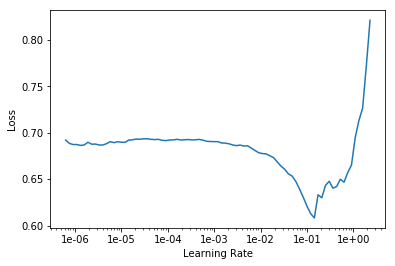

In [46]:
learn.recorder.plot()

In [47]:
learn.fit_one_cycle(8, 5e-3)

epoch,train_loss,valid_loss,time
0,0.564726,0.474142,01:08
1,0.340683,0.311388,01:06
2,0.317562,0.285860,01:04
3,0.302688,0.289350,01:17
4,0.293736,0.273000,01:14
5,0.273558,0.269189,01:11
6,0.274932,0.280159,01:13
7,0.241156,0.266507,01:18


In [48]:
learn.save('first')

In [49]:
learn.load('first');

In [50]:
learn.freeze_to(-2)
learn.fit_one_cycle(4, slice(5e-3/(2.6**4),5e-3))

epoch,train_loss,valid_loss,time
0,0.285588,0.285163,01:19
1,0.294625,0.277652,01:09
2,0.247142,0.273046,01:10
3,0.226931,0.268599,01:21


In [51]:
learn.save('second')

In [52]:
learn.load('second');

In [53]:
learn.freeze_to(-3)
learn.fit_one_cycle(4, slice(2e-4/(2.6**4),5e-4))

epoch,train_loss,valid_loss,time
0,0.222928,0.267204,01:50
1,0.217052,0.261130,01:40
2,0.212952,0.266570,01:27
3,0.194621,0.262396,01:50


In [54]:
learn.save('third')

In [55]:
learn.load('third');

In [56]:
learn.unfreeze()
learn.fit_one_cycle(16, slice(2e-4/(2.6**4),5e-5))

epoch,train_loss,valid_loss,time
0,0.213668,0.264270,01:56
1,0.195024,0.260681,02:13
2,0.213369,0.260868,02:10
3,0.202728,0.259587,02:29
4,0.205875,0.262099,02:22
5,0.193084,0.262562,02:24
6,0.200186,0.261734,02:14
7,0.195819,0.258929,01:59
8,0.190878,0.270190,02:08
9,0.186746,0.258725,02:06


In [57]:
learn.save('fourth')


In [58]:
learn.load('fourth');

In [59]:
learn.predict(
    """
PRIVILEGED AND CONFIDENTIAL - Scott Jones Draft  Attached is the draft testimony of Scott Jones. Comments should be received no later than 3:00 PM EST on Sunday, August 26. All comments and suggestions need to be in writing and can be faxed (not E-mailed) to Dan Watkiss at 202-857-2131. Also, if your suggestion is a proposed addition, please write out the exact language you would propose we incorporate into the testimony and where you would place the addition. Donald A. Kaplan, Esq. Preston Gates Ellis & Rouvelas Meeds LLP Suite 500 1735 New York Avenue, N.W. Washington, D.C. 20006 Ph: (202) 662-8466 Fax: (202) 331-1024 donk@prestongates.com (See attached file: TFG SJones Draft 8-25-01.doc)(See attached file: Exhibit STJ-6.xls)(See attached file: Exhibit STJ-3.xls)(See attached file: Exhibit STJ-4.xls)(See attached file: Exhibit STJ-5.xls)(See attached file: Exhibit STJ-2.doc) CONFIDENTIALITY NOTE: This email message is intended solely for the individual or individuals named above. It may contain confidential attorney-client privileged information and/or attorney work product. If the reader of this message is not the intended recipient, you are requested not to read, copy or distribute it or any of the information it contains. Please delete it immediately and notify the sender by return email or by telephone. Thank you. <<TFG SJones Draft 8-25-01.doc>> <<Exhibit STJ-6.xls>> <<Exhibit STJ-3.xls>> <<Exhibit STJ-4.xls>> <<Exhibit STJ-5.xls>> <<Exhibit STJ-2.doc>> - TFG SJones Draft 8-25-01.doc - Exhibit STJ-6.xls - Exhibit STJ-3.xls - Exhibit STJ-4.xls - Exhibit STJ-5.xls - Exhibit STJ-2.doc
 """ 
  
)

(MultiCategory 1_6,
 tensor([0., 0., 0., 0., 1., 0.]),
 tensor([1.5431e-01, 4.5781e-04, 3.4647e-02, 1.3648e-03, 9.1237e-01, 8.8873e-03]))

In [60]:
learn.predict(
    """
I got a voicemail fro Ken. He would be happy to meet with Freeman. He is willing to work on other times, but suggested the following After 3:00 on May 2nd (right after Ken's speech to the RGA) or late the day before or in the morning of the second (to do this though he would have to cancel his speech to the Texas Governor's business council but he is willing to do this if necessary) His least preferred alternative in this general time frame would be early morning on the third. Jeff -- could you coordinate with Rosie to get the time and place nailed down?
 """ 
  
)

(MultiCategory 1_4,
 tensor([0., 0., 1., 0., 0., 0.]),
 tensor([8.8050e-02, 9.8683e-03, 9.0593e-01, 3.9858e-02, 1.2736e-03, 5.4184e-04]))

In [61]:
learn.predict(
    """
Letter for Lay Signature  Rosie - please print and have signed. (Note there is a typo in the second line of the last paragraph -- does should be "do"). thanks 
  
 """ 
  
)

(MultiCategory 1_6,
 tensor([0., 0., 0., 0., 1., 0.]),
 tensor([6.0054e-03, 1.5552e-02, 7.8041e-02, 4.3270e-04, 9.9931e-01, 6.1111e-03]))

## Classification Verification

In [62]:
data_clas = load_data(path, 'data_clas.pkl', bs=bs)
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)
learn.load('fourth');

In [63]:
interp = ClassificationInterpretation.from_learner(learn = learn, ds_type=DatasetType.Valid)
losses,idxs = interp.top_losses()
#len(data_clas.train_ds)==len(losses)==len(idxs)

In [64]:
len(losses)

1596

In [65]:
losses,idxs = interp.top_losses(k=1)
idxs


tensor([707])

In [66]:
preds,y,losses = learn.get_preds(with_loss=True)
interp = ClassificationInterpretation(learn, preds, y, losses)
len(preds)

266

In [67]:
interp.confusion_matrix()

RuntimeError: Expected object of scalar type Float but got scalar type Long for argument #2 'other'

In [0]:
losses,idxs

In [0]:
interp.plot_confusion_matrix(figsize=(7,7), dpi=600)

In [0]:
learn.model

In [0]:
def list2arr(l):
    "Convert list into pytorch Variable."
    return torch.LongTensor(np.expand_dims(np.array(l), -1)).cuda()

def make_prediction_from_list(model, l):
    """
    Encode a list of integers that represent a sequence of tokens.  The
    purpose is to encode a sentence or phrase.

    Parameters
    -----------
    model : fastai language model
    l : list
        list of integers, representing a sequence of tokens that you want to encode

    """
    arr = list2arr(l)# turn list into pytorch Variable with bs=1
    model.reset()  # language model is stateful, so you must reset upon each prediction
    hidden_states = model(arr)[-1][-1] # RNN Hidden Layer output is last output, and only need the last layer

    #return avg-pooling, max-pooling, and last hidden state
    return hidden_states.mean(0), hidden_states.max(0)[0], hidden_states[-1]

def getDocumentEmbedding(txt, model):
    x,y = data_lm.one_item(txt)
    avg_hs, max_hs, last_hs = make_prediction_from_list(model, x[0])
    v_s = (avg_hs[0]).cpu().detach().numpy()
    return (v_s)

In [0]:
ds = [d[0].data for d in data_clas.train_ds]

In [0]:
ds

In [0]:
df_hs = []
targets = []
for d in ds:
    avg_hs, max_hs, last_hs = make_prediction_from_list(learn.model, d)
    df_hs.append(avg_hs.cpu().detach().numpy()[0].tolist())

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(pd.DataFrame(df_hs))
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [0]:
principalDf

In [0]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
ax.scatter(principalDf['principal component 1']
               , principalDf['principal component 2']
               , s = 50)
ax.grid()

In [0]:
from gensim.summarization.summarizer import summarize

In [0]:
df.text[0]

In [0]:
txt = df.text[5]
print(txt)
print("--------------------------------------------")
print(summarize(txt, word_count=50))

In [0]:
text = """

"""

In [0]:
import re
text = df.text[100]

e = re.sub('\n+','\n',re.sub('\.+','.',re.sub('[^A-Za-z0-9;:. \n\']+', '', text)))
print(summarize(e, word_count=50))

## Create vector files

### 

In [0]:
import pandas as pd
from fastai.text import *
from pathlib import Path
import numpy as np, pandas as pd
import chardet
import random
import torch
import logging

In [0]:
nm_dataset = "Enron_emails"
nm_content = "email_rec_vec.csv"
nm_contact = "contacts.csv"
path = Path("../data")

In [0]:
df = pd.read_csv(path.joinpath("Enron_emails").joinpath(nm_content))
df.head(1)

In [0]:
def list2arr(l):
    "Convert list into pytorch Variable."
    return torch.LongTensor(np.expand_dims(np.array(l), -1)).cuda()

def make_prediction_from_list(model, l):
    """
    Encode a list of integers that represent a sequence of tokens.  The
    purpose is to encode a sentence or phrase.

    Parameters
    -----------
    model : fastai language model
    l : list
        list of integers, representing a sequence of tokens that you want to encode

    """
    arr = list2arr(l)# turn list into pytorch Variable with bs=1
    model.reset()  # language model is stateful, so you must reset upon each prediction
    hidden_states = model(arr)[-1][-1] # RNN Hidden Layer output is last output, and only need the last layer

    #return avg-pooling, max-pooling, and last hidden state
    return hidden_states.mean(0), hidden_states.max(0)[0], hidden_states[-1]

def getDocumentEmbedding(txt, model, data_lm):
    x,y = data_lm.one_item(txt)
    avg_hs, max_hs, last_hs = make_prediction_from_list(model, x[0])
    v_s = (avg_hs[0]).cpu().detach().numpy()
    return (v_s)

In [0]:
bs=8
path.joinpath("tmp").ls()

In [0]:
data_clas = load_data(path.joinpath("tmp"), 'data_clas.pkl', bs=bs)
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.6)
learn.load('fourth');

In [0]:
len(df.text.iloc[156])

In [0]:
g = [getDocumentEmbedding(e[:5000], learn.model,  data_clas) for e in df.text]
df_vec = pd.DataFrame(g)
df1 = pd.merge(df,df_vec, left_index = True, right_index=True)

In [0]:
import re
import math
rrly = []
for e in df1.reply:    
    if (str(e)=="nan"):
        rrly.append("")
    else:
        rrly.append(re.sub(r'\n+', '\n', str(e)).strip())
df1.reply = rrly
df1.to_csv(path.joinpath("Enron_emails").joinpath("email_rec_vec.csv"), index=False)

In [0]:
path.joinpath("Enron_emails").joinpath("email_rec_vec.csv")


In [0]:
df_tmp

In [0]:
lbl_unique